# Sampled AGEBS in 2022

In [38]:
import geopandas as gpd
import pandas as pd

# Read shapefile in folder AGEB Urbano
gdf = gpd.read_file('AGEB Urbano/2023_25006_A09112024_0057.shp')
gdf.head()

,GUID,CVE_GEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,EDICION,VERSION,OID,geometry
0,153762312,2500600014721,25,006,0001,4721,2023,1,1,"POLYGON ((-107.42877 24.75074, -107.42865 24.7..."
1,153762779,2500600016569,25,006,0001,6569,2023,1,2,"POLYGON ((-107.42879 24.85293, -107.42876 24.8..."
2,153762716,2500600018480,25,006,0001,8480,2023,1,3,"POLYGON ((-107.42996 24.84531, -107.42952 24.8..."
3,153762768,2500600019296,25,006,0001,9296,2023,1,4,"POLYGON ((-107.42997 24.84861, -107.43027 24.8..."
4,153762353,2500600015804,25,006,0001,5804,2023,1,5,"POLYGON ((-107.4302 24.82521, -107.43062 24.82..."


In [21]:
# Read 'Geolocalización Estudiantes.kml'
gdf2 = gpd.read_file('Geolocalización Estudiantes.kml')
gdf2.head()

c:\Users\L01032102\AppData\Local\anaconda3\Lib\site-packages\pyogrio\geopandas.py:265: UserWarning: More than one layer found in 'Geolocalización Estudiantes.kml': 'Ubicacion Gpo2.csv' (default), 'Ubicación Gpo1.csv'. Specify layer parameter to avoid this warning.
  result = read_func(


,Name,Description,geometry
0,Anya,﻿Timestamp: 2022/11/02 10:47:20 AM MDT<br>Lati...,POINT Z (-107.4496 24.77018 0)
1,Julian Madueño (Cerro Bola),﻿Timestamp: 2022/11/02 10:49:06 AM MDT<br>Lati...,POINT Z (-107.23552 24.46475 0)
2,Diego Manjarrez Betancourt,﻿Timestamp: 2022/11/02 10:50:11 AM MDT<br>Lati...,POINT Z (-107.46117 24.80751 0)
3,Diana Laura Armenta Vargas,﻿Timestamp: 2022/11/02 10:55:24 AM MDT<br>Lati...,POINT Z (-107.43703 24.80598 0)
4,Carmen Yolanda Gerardo Higuera,﻿Timestamp: 2022/11/02 11:03:43 AM MDT<br>Lati...,POINT Z (-107.42534 24.80347 0)


In [39]:
# Find the polygon that contains each GPS coordinate and add CVE_AGEB to gdf2
gdf2['poly_idx'] = None
gdf2['CVE_AGEB'] = None
for idx, point in gdf2.iterrows():
    for poly_idx, poly in gdf.iterrows():
        if poly.geometry.contains(point.geometry):
            gdf2.at[idx, 'poly_idx'] = poly_idx
            gdf2.at[idx, 'CVE_AGEB'] = poly.CVE_AGEB
            break
gdf2.head()

,Name,Description,geometry,CVE_AGEB,poly_idx
0,Anya,﻿Timestamp: 2022/11/02 10:47:20 AM MDT<br>Lati...,POINT Z (-107.4496 24.77018 0),3899,68
1,Julian Madueño (Cerro Bola),﻿Timestamp: 2022/11/02 10:49:06 AM MDT<br>Lati...,POINT Z (-107.23552 24.46475 0),None,None
2,Diego Manjarrez Betancourt,﻿Timestamp: 2022/11/02 10:50:11 AM MDT<br>Lati...,POINT Z (-107.46117 24.80751 0),7196,596
3,Diana Laura Armenta Vargas,﻿Timestamp: 2022/11/02 10:55:24 AM MDT<br>Lati...,POINT Z (-107.43703 24.80598 0),6677,46
4,Carmen Yolanda Gerardo Higuera,﻿Timestamp: 2022/11/02 11:03:43 AM MDT<br>Lati...,POINT Z (-107.42534 24.80347 0),4882,324


<Axes: >

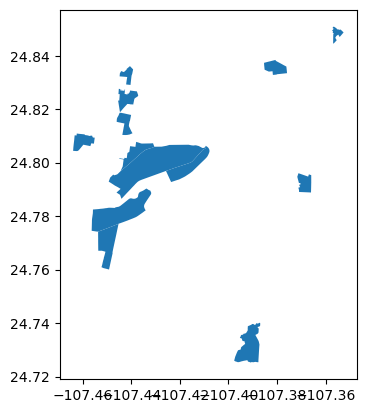

In [40]:
# Get a list of unique values of poly_idx. Eliminate duplicates and non-numbers
poly_list = [idx for idx in gdf2['poly_idx'].unique() if pd.notna(idx)]
# Plot the polygons listed in gdf2 in the column poly_idx
gdf.iloc[poly_list].plot()

In [56]:
# Select Name, CVE_AGEB, and poly_idx columns in a DataFrame
df = gdf2[['Name', 'CVE_AGEB', 'poly_idx']]
df.to_csv('AGEB_Estudiantes.csv', index=False)
df.head()

,Name,CVE_AGEB,poly_idx
0,Anya,3899,68
1,Julian Madueño (Cerro Bola),None,None
2,Diego Manjarrez Betancourt,7196,596
3,Diana Laura Armenta Vargas,6677,46
4,Carmen Yolanda Gerardo Higuera,4882,324


In [ ]:
# Select shapefile that has only the polygons in poly_list.
gdfs = gdf.iloc[poly_list].sort_values(by='OID').reset_index(drop=True)
# Modify OID to list from 1 to len(gdfs)
gdfs['OID'] = gdfs.index + 1
gdfs.head()

,GUID,CVE_GEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,EDICION,VERSION,OID,geometry
0,153762619,2500600013901,25,006,0001,3901,2023,1,1,"POLYGON ((-107.43243 24.78964, -107.43226 24.7..."
1,153762370,2500600016677,25,006,0001,6677,2023,1,2,"POLYGON ((-107.43478 24.80715, -107.43229 24.8..."
2,153762521,2500600012265,25,006,0001,2265,2023,1,3,"POLYGON ((-107.42166 24.79334, -107.42358 24.7..."
3,153762265,2500600013899,25,006,0001,3899,2023,1,4,"POLYGON ((-107.4477 24.76661, -107.44776 24.76..."
4,153762730,250060001750A,25,006,0001,750A,2023,1,5,"POLYGON ((-107.35663 24.85091, -107.35556 24.8..."


In [54]:
# Save the shapefile
gdfs.to_file('Sample_AGEBS/sample_agebs.shp')